#### Load dataset

In [1]:
from sklearn.datasets import fetch_openml

In [4]:
mnist_dataset=fetch_openml("mnist_784", as_frame=False)

In [5]:
mnist_dataset

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784)),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',


#### SGDClassifier

In [6]:
mnist_dataset.data.shape

(70000, 784)

In [7]:
X, y =mnist_dataset.data, mnist_dataset.target

In [8]:
import matplotlib.pyplot as plt

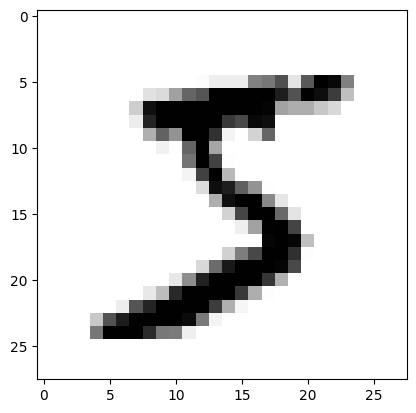

In [15]:
plt.imshow(X[0].reshape(28, 28), cmap="binary")

In [16]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
from sklearn.linear_model import SGDClassifier

In [19]:
y_train8 = (y_train=="8")
y_test8 = (y_test == "8")

In [20]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train8)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [22]:
sgd.predict(X_train[-3:])

array([False, False,  True])

### Confusion Matrix

In [23]:
sgd.score(X_train, y_train8)

0.94715

In [24]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(sgd, X_train, y_train8, cv=5, scoring="accuracy")

array([0.93916667, 0.93741667, 0.93333333, 0.9375    , 0.93758333])

In [27]:
from sklearn.dummy import DummyClassifier

In [28]:
dummy_c=DummyClassifier()
dummy_c.fit(X_train, y_train8)

,strategy,'prior'
,random_state,None
,constant,None


In [29]:
dummy_c.predict(X_train).sum()

np.int64(0)

In [30]:
cross_val_score(dummy_c, X_train, y_train8, cv=5, scoring="accuracy")

array([0.9025    , 0.9025    , 0.9025    , 0.9025    , 0.90241667])